# **CV_LSTM**

***1. IMPORT PACKAGES AND LIBRARIES***

In [ ]:
import pandas as pd
from nltk import word_tokenize
from collections import Counter

***2. LOAD DATASET***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/thesiss/Spanish_merged_dataa.csv')

In [ ]:
data.drop(['Unnamed: 0','clean_with_stopwords', 'Text'], axis=1, inplace=True)

In [ ]:
data

,Category,final_clean
0,1,rae incluir palabra lady diccionario idioma es...
1,1,palabra haigar aceptado rae real academia leng...
2,1,yordi rosado escribir diseñar nuevo libro text...
3,0,unam capacitar maestro aprobar prueba pis maxi...
4,1,alerta pretender aprobar libro escolar conteni...
...,...,...
2966,0,consejo gobierno haber dar visto bueno convoca...
2967,0,investigador valenciano haber desarrollar inno...
2968,0,arrestado actuar coche establecimiento policia...
2969,0,rey haber encargar miercoles pedro sanchez pre...


***3. CONVERT TO VECTORS***

In [ ]:
data['final_clean'].isnull().sum()

0

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer(max_features=3000)
output=vectorizer.fit_transform(data['final_clean'])

In [ ]:
output

<2971x3000 sparse matrix of type '<class 'numpy.int64'>'
	with 131035 stored elements in Compressed Sparse Row format>

***4. SPLIT DATA***

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(output.toarray(),data['Category'].values,test_size=0.2,random_state=0)

***5. BUILD THE MODEL***

In [ ]:
#Creating the lstm model
from keras.models import Sequential
from keras.layers import Dense,Embedding, LSTM, RNN, Dropout
import tensorflow as tf
from keras.regularizers import l2
from tensorflow.keras.optimizers import Adam,SGD

model=Sequential()
model.add(LSTM(500,input_shape=(1,3000), kernel_regularizer=l2(0.01)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
#Compiling the model
adam=Adam(learning_rate=0.0001)
model.compile(adam, loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 500)               7002000   
                                                                 
 dense_4 (Dense)             (None, 32)                16032     
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 7,018,065
Trainable params: 7,018,065
Non-trainable params: 0
_________________________________________________________________


***6. RESHAPE AND TRAIN THE MODEL***

In [ ]:
X_train_new=X_train.reshape(X_train.shape[0],1,X_train.shape[1])
X_valid_new=X_val.reshape(X_val.shape[0],1,X_val.shape[1])
history = model.fit(X_train_new,y_train,validation_data=(X_valid_new,y_val),epochs=15)

Epoch 1/15
75/75 [==============================] - 4s 24ms/step - loss: 18.4203 - accuracy: 0.5888 - val_loss: 13.0199 - val_accuracy: 0.6622
Epoch 2/15
75/75 [==============================] - 1s 15ms/step - loss: 9.6127 - accuracy: 0.7075 - val_loss: 6.7458 - val_accuracy: 0.7277
Epoch 3/15
75/75 [==============================] - 1s 15ms/step - loss: 4.9716 - accuracy: 0.7542 - val_loss: 3.5220 - val_accuracy: 0.7513
Epoch 4/15
75/75 [==============================] - 1s 14ms/step - loss: 2.6228 - accuracy: 0.7673 - val_loss: 1.9423 - val_accuracy: 0.7563
Epoch 5/15
75/75 [==============================] - 1s 15ms/step - loss: 1.4865 - accuracy: 0.7908 - val_loss: 1.1988 - val_accuracy: 0.7731
Epoch 6/15
75/75 [==============================] - 1s 15ms/step - loss: 0.9558 - accuracy: 0.8127 - val_loss: 0.8717 - val_accuracy: 0.7714
Epoch 7/15
75/75 [==============================] - 1s 14ms/step - loss: 0.7145 - accuracy: 0.8321 - val_loss: 0.7307 - val_accuracy: 0.7782
Epoch 8/15


***7. PLOT THE ACCURACY AND LOSS***

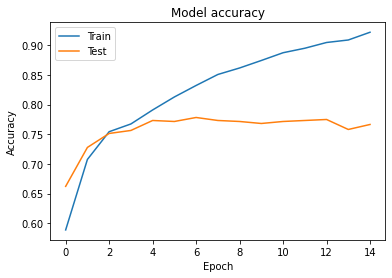

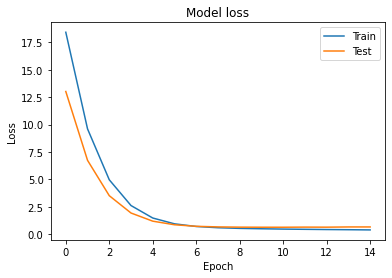

In [ ]:
import matplotlib.pyplot as plt  # it overfits after epoch 11, but starts to learn again after 14

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [ ]:
model.save('lstm_fr')
loaded_model=tf.keras.models.load_model('lstm_fr')

INFO:tensorflow:Assets written to: lstm_fr/assets


INFO:tensorflow:Assets written to: lstm_fr/assets


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
y_pred_valid=(model.predict(X_valid_new)>0.5).astype(int)

In [ ]:
print(classification_report(y_val,y_pred_valid))

              precision    recall  f1-score   support

           0       0.78      0.75      0.76       299
           1       0.76      0.78      0.77       296

    accuracy                           0.77       595
   macro avg       0.77      0.77      0.77       595
weighted avg       0.77      0.77      0.77       595



In [ ]:
confusion_matrix(y_val,y_pred_valid)

array([[225,  74],
       [ 65, 231]])

In [ ]:
loaded_model=tf.keras.models.load_model('/content/model1')